# This notebook has examples from GSEApy documentations

In [11]:
from pathlib import Path
GSEA_DATA_PATH = Path('/home/tealeave/projects/GSEApy/')

# Biomart

In [2]:
# %matplotlib inline
# %config InlineBackend.figure_format='retina' # mac
# %load_ext autoreload
# %autoreload 2
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt

gp.__version__

'1.0.5'

In [3]:
from gseapy import Biomart
bm = Biomart()
## view validated marts
# marts = bm.get_marts()
## view validated dataset
# datasets = bm.get_datasets(mart='ENSEMBL_MART_ENSEMBL')
## view validated attributes
# attrs = bm.get_attributes(dataset='hsapiens_gene_ensembl')
## view validated filters
# filters = bm.get_filters(dataset='hsapiens_gene_ensembl')
## query results
queries ={'ensembl_gene_id': ['ENSG00000125285','ENSG00000182968'] } # need to be a dict object
results = bm.query(dataset='hsapiens_gene_ensembl',
                   attributes=['ensembl_gene_id', 'external_gene_name', 'entrezgene_id', 'go_id'],
                   filters=queries)
results.tail()

,ensembl_gene_id,external_gene_name,entrezgene_id,go_id
36,ENSG00000182968,SOX1,6656,GO:0021884
37,ENSG00000182968,SOX1,6656,GO:0030900
38,ENSG00000182968,SOX1,6656,GO:0048713
39,ENSG00000182968,SOX1,6656,GO:1904936
40,ENSG00000182968,SOX1,6656,GO:1990830


In [4]:
results.dtypes

ensembl_gene_id       object
external_gene_name    object
entrezgene_id          Int32
go_id                 object
dtype: object

In [5]:
from gseapy import Biomart
bm = Biomart()
# note the dataset and attribute names are different
m2h = bm.query(dataset='mmusculus_gene_ensembl',
               attributes=['ensembl_gene_id','external_gene_name',
                           'hsapiens_homolog_ensembl_gene',
                           'hsapiens_homolog_associated_gene_name'])

h2m = bm.query(dataset='hsapiens_gene_ensembl',
               attributes=['ensembl_gene_id','external_gene_name',
                           'mmusculus_homolog_ensembl_gene',
                           'mmusculus_homolog_associated_gene_name'])

In [6]:
h2m.sample(10)

,ensembl_gene_id,external_gene_name,mmusculus_homolog_ensembl_gene,mmusculus_homolog_associated_gene_name
352,ENSG00000235059,NaN,NaN,NaN
30764,ENSG00000170448,NFXL1,ENSMUSG00000072889,Nfxl1
40054,ENSG00000174099,MSRB3,ENSMUSG00000051236,Msrb3
5284,ENSG00000277151,NaN,NaN,NaN
16747,ENSG00000285536,LINC02838,NaN,NaN
1346,ENSG00000231058,MSANTD2P1,NaN,NaN
68356,ENSG00000243483,DNAJB1P2,NaN,NaN
10495,ENSG00000186925,KRTAP19-6,NaN,NaN
55855,ENSG00000259516,ANP32AP1,NaN,NaN
73026,ENSG00000162591,MEGF6,ENSMUSG00000057751,Megf6


In [13]:
# get a dict symbol mappings
h2m_dict = {}
for i, row in h2m.loc[:,["external_gene_name", "mmusculus_homolog_associated_gene_name"]].iterrows():
    if row.isna().any(): continue
    h2m_dict[row['external_gene_name']] = row["mmusculus_homolog_associated_gene_name"]
# read gmt file into dict
kegg = gp.read_gmt(path= str(GSEA_DATA_PATH.joinpath( "tests/extdata/enrichr.KEGG_2016.gmt")) )
print(kegg['MAPK signaling pathway Homo sapiens hsa04010'][:10])



['EGF', 'IL1R1', 'IL1R2', 'HSPA1L', 'CACNA2D2', 'CACNA2D1', 'CACNA2D4', 'CACNA2D3', 'MAPK8IP3', 'MAPK8IP1']


In [14]:
kegg_mouse = {}
for term, genes in kegg.items():
    new_genes = []
    for gene in genes:
        if gene in h2m_dict:
            new_genes.append(h2m_dict[gene])
    kegg_mouse[term] = new_genes
print(kegg_mouse['MAPK signaling pathway Homo sapiens hsa04010'][:10])

['Egf', 'Il1r1', 'Il1r2', 'Hspa1l', 'Cacna2d2', 'Cacna2d1', 'Cacna2d4', 'Cacna2d3', 'Mapk8ip3', 'Mapk8ip1']


# ENricher API

In [8]:
# default: Human
names = gp.get_library_name()
names[:10]

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021']

In [9]:
# yeast
yeast = gp.get_library_name(organism='Yeast')
yeast[:10]

['Cellular_Component_AutoRIF',
 'Cellular_Component_AutoRIF_Predicted_zscore',
 'GO_Biological_Process_2018',
 'GO_Biological_Process_AutoRIF',
 'GO_Biological_Process_AutoRIF_Predicted_zscore',
 'GO_Cellular_Component_2018',
 'GO_Cellular_Component_AutoRIF',
 'GO_Cellular_Component_AutoRIF_Predicted_zscore',
 'GO_Molecular_Function_2018',
 'GO_Molecular_Function_AutoRIF']

In [15]:
## download library or read a .gmt file
go_mf = gp.get_library(name='GO_Molecular_Function_2018', organism='Yeast')
print(go_mf['ATP binding (GO:0005524)'])

['MLH1', 'ECM10', 'RLI1', 'SSB1', 'SSB2', 'YTA12', 'MSH2', 'CDC6', 'HMI1', 'YNL247W', 'MSH6', 'SSQ1', 'MCM7', 'SRS2', 'HSP104', 'SSA1', 'MCX1', 'SSC1', 'ARP2', 'ARP3', 'SSE1', 'SMC2', 'SSZ1', 'TDA10', 'ORC5', 'VPS4', 'RBK1', 'SSA4', 'NEW1', 'ORC1', 'SSA2', 'KAR2', 'SSA3', 'DYN1', 'PGK1', 'VPS33', 'LHS1', 'CDC123', 'PMS1']


In [25]:
# read in an example gene list
gene_list = pd.read_csv( GSEA_DATA_PATH.joinpath("./tests/data/gene_list.txt"),header=None, sep="\t")
# convert dataframe or series to list
glist = gene_list.squeeze().str.strip().to_list()
len(glist), glist[:10]

(856,
 ['IGKV4-1',
  'CD55',
  'IGKC',
  'PPFIBP1',
  'ABHD4',
  'PCSK6',
  'PGD',
  'ARHGDIB',
  'ITGB2',
  'CARD6'])

In [19]:
# if you are only intrested in dataframe that enrichr returned, please set outdir=None
enr = gp.enrichr(gene_list=gene_list, # or "./tests/data/gene_list.txt",
                 gene_sets=['MSigDB_Hallmark_2020','KEGG_2021_Human'],
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )
# obj.results stores all results
enr.results.head(5)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,MSigDB_Hallmark_2020,IL-6/JAK/STAT3 Signaling,19/87,1.197225e-09,5.986123e-08,0,0,6.844694,140.612324,IL4R;TGFB1;IL1R1;IFNGR1;IL10RB;ITGB3;IFNGR2;IL...
1,MSigDB_Hallmark_2020,TNF-alpha Signaling via NF-kB,27/200,3.220898e-08,5.368163e-07,0,0,3.841568,66.270963,BTG2;BCL2A1;PLEK;IRS2;LITAF;IFIH1;PANX1;DRAM1;...
2,MSigDB_Hallmark_2020,Complement,27/200,3.220898e-08,5.368163e-07,0,0,3.841568,66.270963,FCN1;LRP1;PLEK;LIPA;CA2;CASP3;LAMP2;S100A12;FY...
3,MSigDB_Hallmark_2020,Inflammatory Response,24/200,1.635890e-06,2.044862e-05,0,0,3.343018,44.540108,LYN;IFITM1;BTG2;IL4R;CD82;IL1R1;IFNGR2;ITGB3;F...
4,MSigDB_Hallmark_2020,heme Metabolism,23/200,5.533816e-06,5.533816e-05,0,0,3.181358,38.509172,SLC22A4;MPP1;BNIP3L;BTG2;ARHGEF12;NEK7;GDE1;FO...


In [26]:
# backgound only reconigized a gene list input.
enr_bg = gp.enrichr(gene_list=gene_list,
                 gene_sets=['MSigDB_Hallmark_2020','KEGG_2021_Human'],
                 # organism='human', # organism argment is ignored because user input a background
                 background=str(GSEA_DATA_PATH.joinpath("tests/data/background.txt")),
                 outdir=None, # don't write to disk
                )
enr_bg.results.head() #

2023-08-24 18:07:44,504 [WARNING] Downloading /home/tealeave/projects/GSEApy/tests/data/background.txt for the first time. It might take a couple of miniutes.
2023-08-24 18:07:51,893 [ERROR] Query ERROR: caught BioMart::Exception::Usage: WITHIN Virtual Schema : default, Dataset /home/tealeave/projects/GSEApy/tests/data/background.txt NOT FOUND


AttributeError: 'NoneType' object has no attribute 'dropna'

# Plotting

In [22]:
# simple plotting function
from gseapy import barplot, dotplot

In [31]:
enr.results

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,MSigDB_Hallmark_2020,IL-6/JAK/STAT3 Signaling,19/87,1.197225e-09,5.986123e-08,0,0,6.844694,140.612324,IL4R;TGFB1;IL1R1;IFNGR1;IL10RB;ITGB3;IFNGR2;IL...
1,MSigDB_Hallmark_2020,TNF-alpha Signaling via NF-kB,27/200,3.220898e-08,5.368163e-07,0,0,3.841568,66.270963,BTG2;BCL2A1;PLEK;IRS2;LITAF;IFIH1;PANX1;DRAM1;...
2,MSigDB_Hallmark_2020,Complement,27/200,3.220898e-08,5.368163e-07,0,0,3.841568,66.270963,FCN1;LRP1;PLEK;LIPA;CA2;CASP3;LAMP2;S100A12;FY...
3,MSigDB_Hallmark_2020,Inflammatory Response,24/200,1.635890e-06,2.044862e-05,0,0,3.343018,44.540108,LYN;IFITM1;BTG2;IL4R;CD82;IL1R1;IFNGR2;ITGB3;F...
4,MSigDB_Hallmark_2020,heme Metabolism,23/200,5.533816e-06,5.533816e-05,0,0,3.181358,38.509172,SLC22A4;MPP1;BNIP3L;BTG2;ARHGEF12;NEK7;GDE1;FO...
...,...,...,...,...,...,...,...,...,...,...
326,KEGG_2021_Human,RNA transport,3/186,9.809203e-01,9.950561e-01,0,0,0.391159,0.007535,NUP98;PABPC1;MAGOHB
327,KEGG_2021_Human,Protein digestion and absorption,1/103,9.852351e-01,9.950561e-01,0,0,0.234337,0.003486,MME
328,KEGG_2021_Human,Ribosome biogenesis in eukaryotes,1/108,9.879739e-01,9.950561e-01,0,0,0.223328,0.002702,GNL3L
329,KEGG_2021_Human,Neuroactive ligand-receptor interaction,6/341,9.940573e-01,9.976075e-01,0,0,0.425542,0.002536,HRH2;FPR1;LPAR1;LPAR2;F2RL1;FPR2


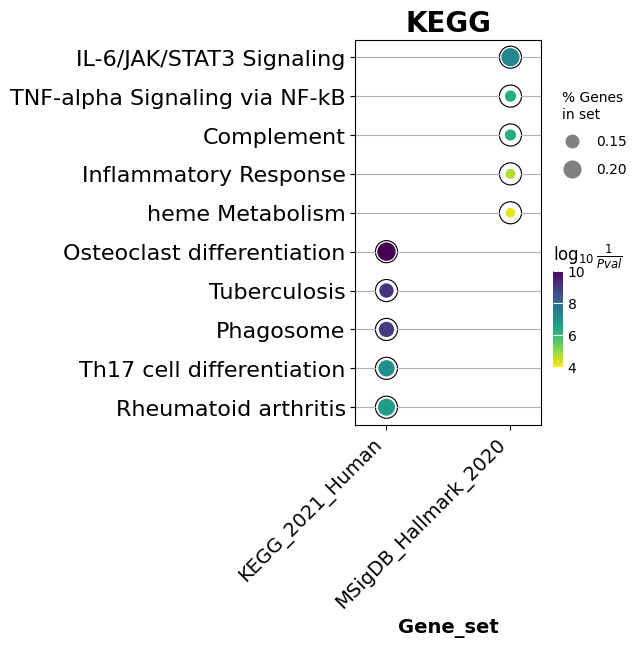

In [30]:
# categorical scatterplot
ax = dotplot(enr.results,
              column="Adjusted P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=10,
              top_term=5,
              figsize=(3,5),
              title = "KEGG",
              xticklabels_rot=45, # rotate xtick labels
              show_ring=True, # set to False to revmove outer ring
              marker='o',
             )

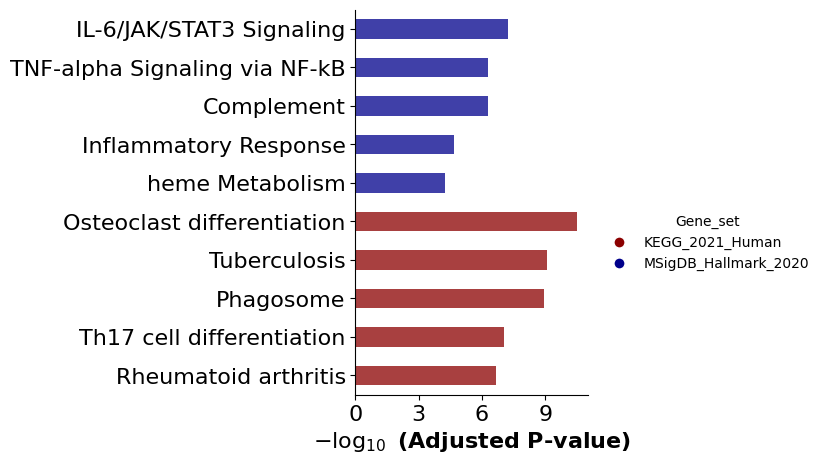

In [24]:
# categorical scatterplot
ax = barplot(enr.results,
              column="Adjusted P-value",
              group='Gene_set', # set group, so you could do a multi-sample/library comparsion
              size=10,
              top_term=5,
              figsize=(3,5),
              color=['darkred', 'darkblue'] # set colors for group
             )

In [28]:
enr.res2d

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Osteoclast differentiation,28/127,1.116188e-13,3.136489e-11,0,0,6.997802,208.700250,LILRA6;ITGB3;LILRA2;LILRA5;PPP3R1;FCGR3B;SIRPA...
1,KEGG_2021_Human,Tuberculosis,31/180,5.807040e-12,8.158891e-10,0,0,5.154266,133.350924,RAB5B;ITGB2;PPP3R1;HLA-DMA;FCGR3B;HLA-DMB;CASP...
2,KEGG_2021_Human,Phagosome,28/152,1.164075e-11,1.090350e-09,0,0,5.579642,140.475916,ATP6V1A;RAB5B;ITGB5;ITGB3;ITGB2;HLA-DMA;FCGR3B...
3,KEGG_2021_Human,Th17 cell differentiation,21/107,1.302048e-09,9.146888e-08,0,0,5.991492,122.581892,HSP90AA1;IL4R;TGFB1;IL1R1;IFNGR1;IFNGR2;IL1RAP...
4,KEGG_2021_Human,Rheumatoid arthritis,19/93,3.929712e-09,2.208498e-07,0,0,6.287746,121.697438,ATP6V1A;ATP6V0B;ATP6V1G1;TGFB1;ITGB2;FOS;ITGAL...
...,...,...,...,...,...,...,...,...,...,...
276,KEGG_2021_Human,RNA transport,3/186,9.809203e-01,9.950561e-01,0,0,0.391159,0.007535,NUP98;PABPC1;MAGOHB
277,KEGG_2021_Human,Protein digestion and absorption,1/103,9.852351e-01,9.950561e-01,0,0,0.234337,0.003486,MME
278,KEGG_2021_Human,Ribosome biogenesis in eukaryotes,1/108,9.879739e-01,9.950561e-01,0,0,0.223328,0.002702,GNL3L
279,KEGG_2021_Human,Neuroactive ligand-receptor interaction,6/341,9.940573e-01,9.976075e-01,0,0,0.425542,0.002536,HRH2;FPR1;LPAR1;LPAR2;F2RL1;FPR2


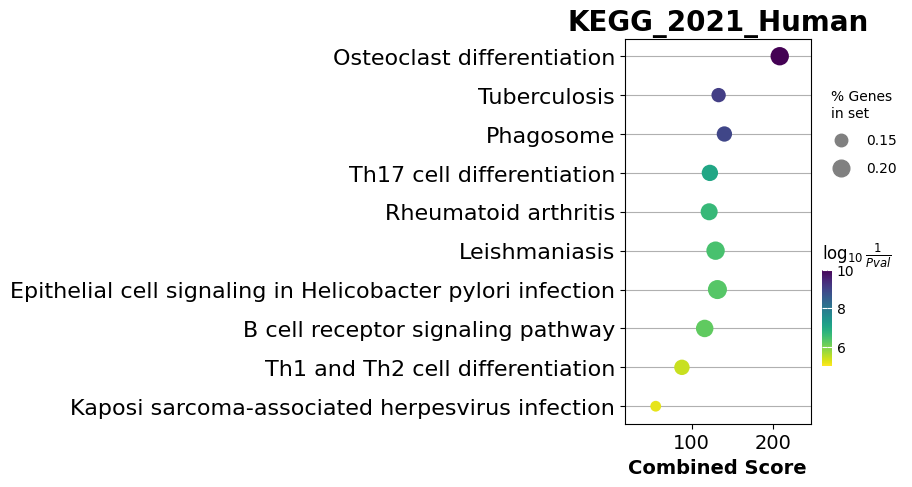

In [32]:
# to save your figure, make sure that ``ofname`` is not None
ax = dotplot(enr.res2d, title='KEGG_2021_Human',cmap='viridis_r', size=10, figsize=(3,5))

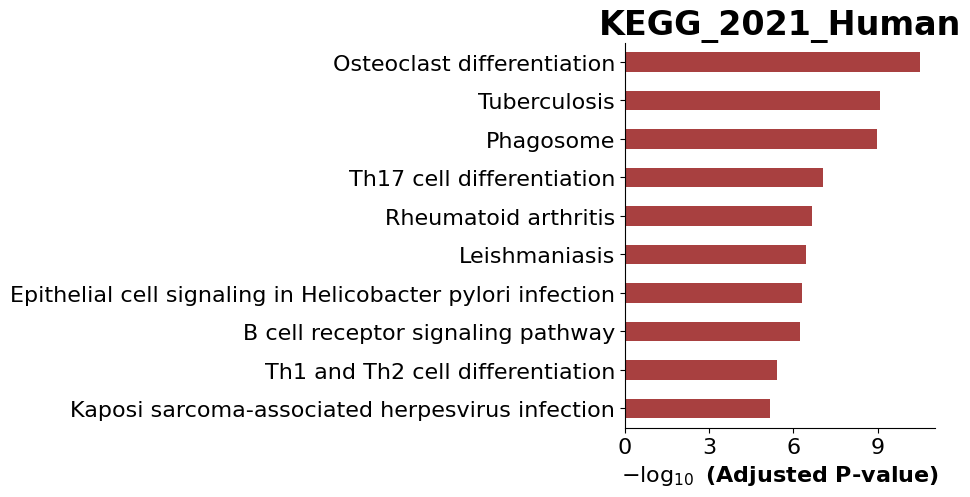

In [33]:
# to save your figure, make sure that ``ofname`` is not None
ax = barplot(enr.res2d,title='KEGG_2021_Human', figsize=(4, 5), color='darkred')

# Prerank

In [34]:
rnk = pd.read_csv( GSEA_DATA_PATH.joinpath("./tests/data/temp.rnk"), header=None, index_col=0, sep="\t")
rnk.head()

,1
0,
ATXN1,16.456753
UBQLN4,13.989493
CALM1,13.745533
DLG4,12.796588
MRE11A,12.787631


In [35]:
rnk.shape

(22922, 1)

In [38]:
# # run prerank
# # enrichr libraries are supported by prerank module. Just provide the name
# # use 4 process to acceralate the permutation speed
pre_res = gp.prerank(rnk= rnk, # or rnk = rnk,
                     gene_sets='KEGG_2016',
                     threads=4,
                     min_size=5,
                     max_size=1000,
                     permutation_num=1000, # reduce number to speed up testing
                     outdir=None, # don't write to disk
                     seed=6,
                     verbose=True, # see what's going on behind the scenes
                    )

2023-08-24 19:55:17,507 [WARNING] Duplicated values found in preranked stats: 4.97% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2023-08-24 19:55:17,508 [INFO] Parsing data files for GSEA.............................


In [39]:
pre_res.res2d.head(5)

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,Adherens junction Homo sapiens hsa04520,0.784625,1.912548,0.0,0.0,0.0,47/74,10.37%,CTNNB1;EGFR;RAC1;TGFBR1;SMAD4;MET;EP300;CDC42;...
1,prerank,Glioma Homo sapiens hsa05214,0.784678,1.906706,0.0,0.0,0.0,52/65,16.29%,CALM1;GRB2;EGFR;PRKCA;KRAS;HRAS;TP53;MAPK1;PRK...
2,prerank,Estrogen signaling pathway Homo sapiens hsa04915,0.766347,1.897957,0.0,0.0,0.0,74/99,16.57%,CALM1;PRKACA;GRB2;SP1;EGFR;KRAS;HRAS;HSP90AB1;...
3,prerank,Thyroid hormone signaling pathway Homo sapiens...,0.7577,1.891815,0.0,0.0,0.0,84/118,16.29%,CTNNB1;PRKACA;PRKCA;KRAS;NOTCH1;EP300;CREBBP;H...
4,prerank,Long-term potentiation Homo sapiens hsa04720,0.778249,1.888739,0.0,0.0,0.0,42/66,9.01%,CALM1;PRKACA;PRKCA;KRAS;EP300;CREBBP;HRAS;PRKA...


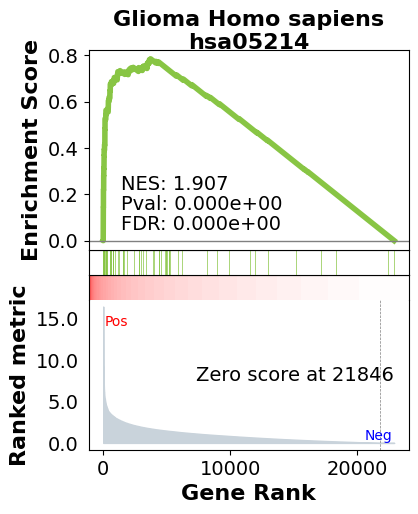

In [40]:
## easy way
terms = pre_res.res2d.Term
axs = pre_res.plot(terms=terms[1]) # v1.0.5
# to make more control on the plot, use
# from gseapy import gseaplot
# gseaplot(rank_metric=pre_res.ranking, term=terms[0], ofname='your.plot.pdf', **pre_res.results[terms[0]])

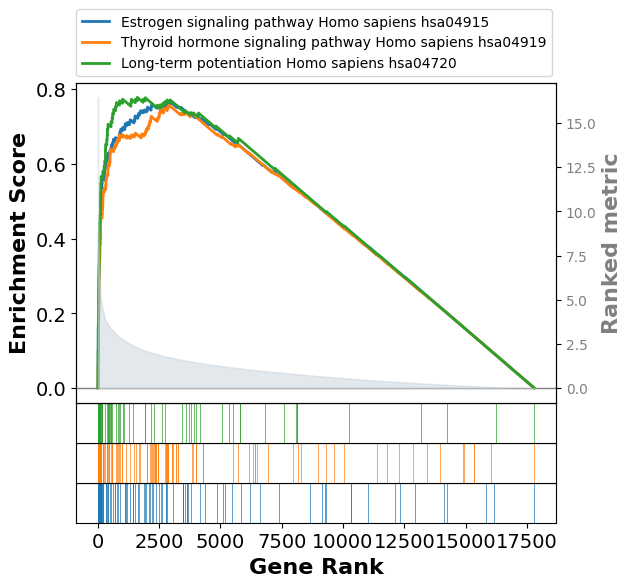

In [46]:
xs = pre_res.plot(terms=terms[1:5],
                   #legend_kws={'loc': (1.2, 0)}, # set the legend loc
                   show_ranking=True, # whether to show the second yaxis
                   figsize=(3,4)
                  )
# or use this to have more control on the plot
# from gseapy import gseaplot2
# terms = pre_res.res2d.Term[1:5]
# hits = [pre_res.results[t]['hits'] for t in terms]
# runes = [pre_res.results[t]['RES'] for t in terms]
# fig = gseaplot2(terms=terms, ress=runes, hits=hits,
#               rank_metric=gs_res.ranking,
#               legend_kws={'loc': (1.2, 0)}, # set the legend loc
#               figsize=(4,5)) # rank_metric=pre_res.ranking

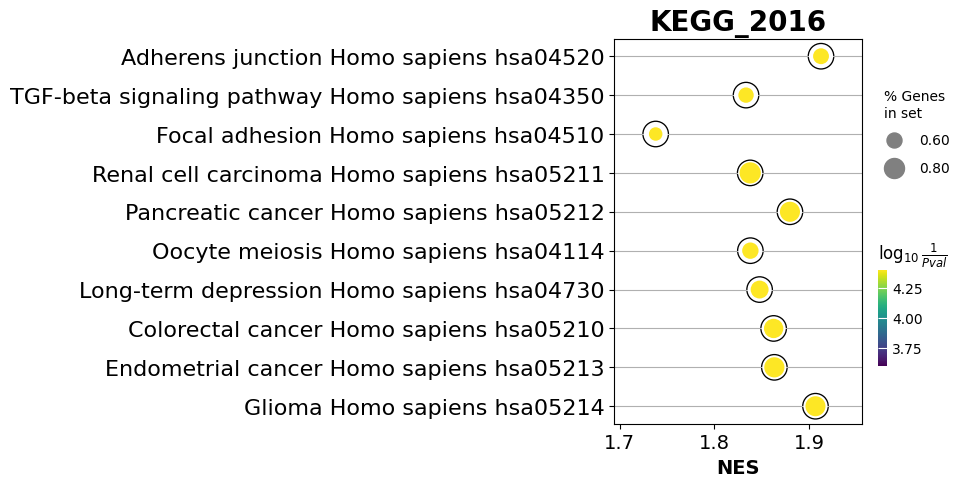

In [50]:
from gseapy import dotplot
# to save your figure, make sure that ``ofname`` is not None
ax = dotplot(pre_res.res2d,
             column="FDR q-val",
             title='KEGG_2016',
             cmap=plt.cm.viridis,
             size=3, # adjust dot size
             figsize=(4,5), cutoff=0.25, show_ring=True)

In [51]:
from gseapy import enrichment_map
# return two dataframe
nodes, edges = enrichment_map(pre_res.res2d)

In [54]:
import networkx as nx

In [53]:
pre_res.res2d

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,Adherens junction Homo sapiens hsa04520,0.784625,1.912548,0.0,0.0,0.0,47/74,10.37%,CTNNB1;EGFR;RAC1;TGFBR1;SMAD4;MET;EP300;CDC42;...
1,prerank,Glioma Homo sapiens hsa05214,0.784678,1.906706,0.0,0.0,0.0,52/65,16.29%,CALM1;GRB2;EGFR;PRKCA;KRAS;HRAS;TP53;MAPK1;PRK...
2,prerank,Estrogen signaling pathway Homo sapiens hsa04915,0.766347,1.897957,0.0,0.0,0.0,74/99,16.57%,CALM1;PRKACA;GRB2;SP1;EGFR;KRAS;HRAS;HSP90AB1;...
3,prerank,Thyroid hormone signaling pathway Homo sapiens...,0.7577,1.891815,0.0,0.0,0.0,84/118,16.29%,CTNNB1;PRKACA;PRKCA;KRAS;NOTCH1;EP300;CREBBP;H...
4,prerank,Long-term potentiation Homo sapiens hsa04720,0.778249,1.888739,0.0,0.0,0.0,42/66,9.01%,CALM1;PRKACA;PRKCA;KRAS;EP300;CREBBP;HRAS;PRKA...
...,...,...,...,...,...,...,...,...,...,...
287,prerank,Glycosphingolipid biosynthesis - globo series ...,0.322236,0.689588,0.928138,0.997151,1.0,9/14,52.20%,B3GALNT1;ST8SIA1;HEXA;ST3GAL1;HEXB;FUT2;FUT1;A...
288,prerank,Glycosaminoglycan biosynthesis - chondroitin s...,0.307094,0.6821,0.943944,0.995269,1.0,15/20,60.27%,CSGALNACT1;XYLT1;CHSY3;CHST3;UST;CSGALNACT2;CH...
289,prerank,Ascorbate and aldarate metabolism Homo sapiens...,0.285276,0.64861,0.974975,0.99756,1.0,10/27,52.17%,RGN;ALDH1B1;ALDH9A1;ALDH2;ALDH7A1;UGT2B15;ALDH...
290,prerank,Other glycan degradation Homo sapiens hsa00511,0.291452,0.641186,0.965898,0.995148,1.0,16/18,68.36%,HEXDC;MAN2C1;HEXA;MAN2B1;HEXB;FUCA2;NEU3;NEU4;...


In [55]:
# build graph
G = nx.from_pandas_edgelist(edges,
                            source='src_idx',
                            target='targ_idx',
                            edge_attr=['jaccard_coef', 'overlap_coef', 'overlap_genes'])

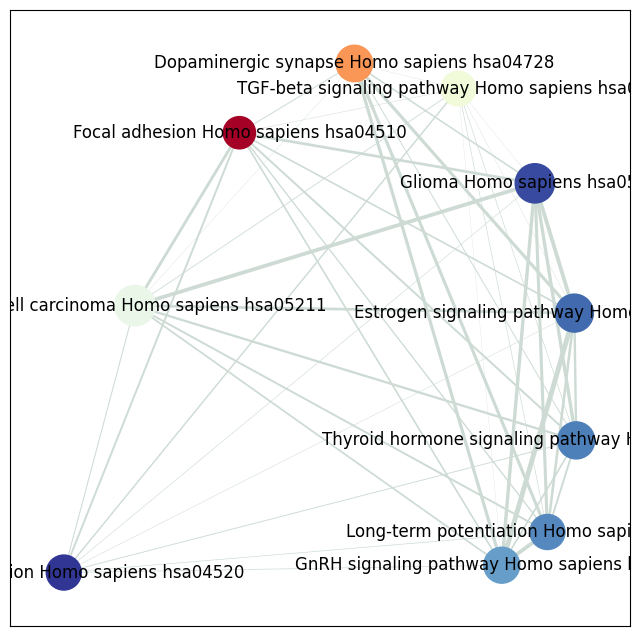

In [56]:
fig, ax = plt.subplots(figsize=(8, 8))

# init node cooridnates
pos=nx.layout.spiral_layout(G)
#node_size = nx.get_node_attributes()
# draw node
nx.draw_networkx_nodes(G,
                       pos=pos,
                       cmap=plt.cm.RdYlBu,
                       node_color=list(nodes.NES),
                       node_size=list(nodes.Hits_ratio *1000))
# draw node label
nx.draw_networkx_labels(G,
                        pos=pos,
                        labels=nodes.Term.to_dict())
# draw edge
edge_weight = nx.get_edge_attributes(G, 'jaccard_coef').values()
nx.draw_networkx_edges(G,
                       pos=pos,
                       width=list(map(lambda x: x*10, edge_weight)),
                       edge_color='#CDDBD4')
plt.show()